In [1]:
from IPython.display import display

In [2]:
import os

In [3]:
import site
site.addsitedir(os.path.join(os.getenv("HOME"), "pyenv/mlpractice/lib/python3.7/site-packages/"))

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set_theme()

In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

**Columns**

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## **TotalCharges**

In [10]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [11]:
df.loc[df["TotalCharges"].str.len() == 0, "TotalCharges"]

488     
753     
936     
1082    
1340    
3331    
3826    
4380    
5218    
6670    
6754    
Name: TotalCharges, dtype: object

In [12]:
df.loc[df["TotalCharges"].str.len() == 0, "TotalCharges"] = df[df["TotalCharges"].str.len() == 0]["MonthlyCharges"].astype("str")

In [13]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [14]:
df.drop("customerID", inplace=True, axis=1)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

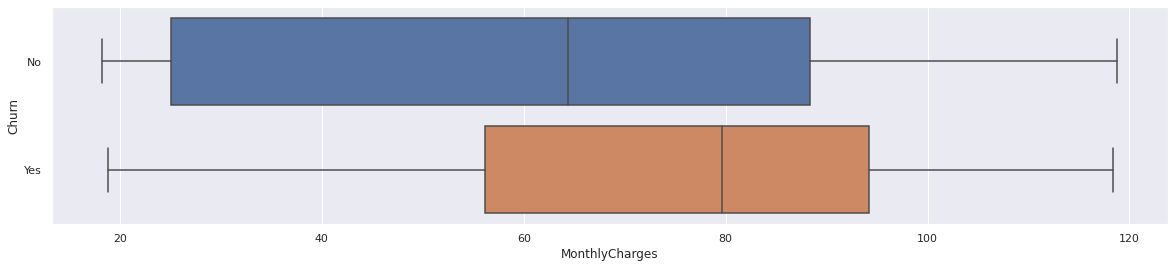

In [15]:
plt.figure(figsize=(20, 4))
sns.boxplot(y="Churn", x="MonthlyCharges", data=df)

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

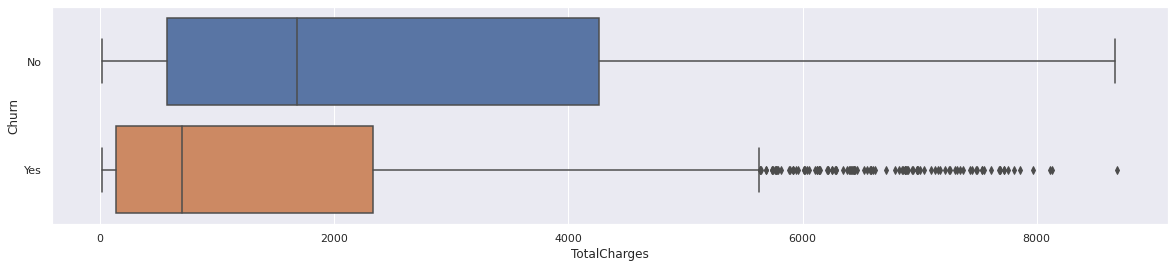

In [16]:
plt.figure(figsize=(20, 4))
sns.boxplot(y="Churn", x="TotalCharges", data=df)

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

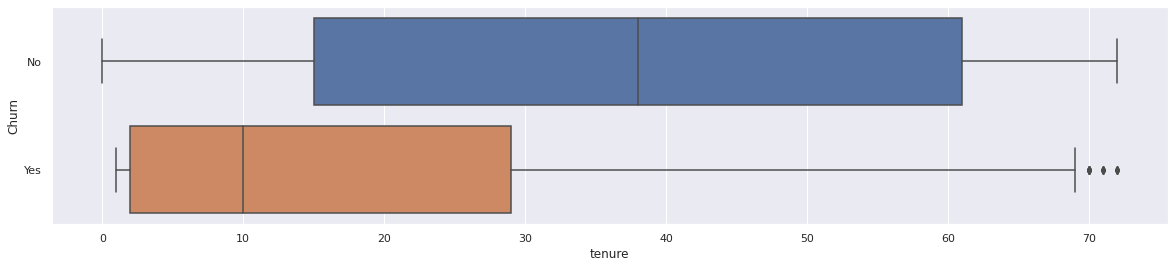

In [17]:
plt.figure(figsize=(20, 4))
sns.boxplot(y="Churn", x="tenure", data=df)

In [18]:
Categorial_cols = []
for col, col_type in df.dtypes.iteritems():
    if str(col_type) == 'object':
        Categorial_cols.append(col)
        display(df[col].value_counts().to_frame())
        print('-'*40)

,gender
Male,3555
Female,3488


----------------------------------------


,Partner
No,3641
Yes,3402


----------------------------------------


,Dependents
No,4933
Yes,2110


----------------------------------------


,PhoneService
Yes,6361
No,682


----------------------------------------


,MultipleLines
No,3390
Yes,2971
No phone service,682


----------------------------------------


,InternetService
Fiber optic,3096
DSL,2421
No,1526


----------------------------------------


,OnlineSecurity
No,3498
Yes,2019
No internet service,1526


----------------------------------------


,OnlineBackup
No,3088
Yes,2429
No internet service,1526


----------------------------------------


,DeviceProtection
No,3095
Yes,2422
No internet service,1526


----------------------------------------


,TechSupport
No,3473
Yes,2044
No internet service,1526


----------------------------------------


,StreamingTV
No,2810
Yes,2707
No internet service,1526


----------------------------------------


,StreamingMovies
No,2785
Yes,2732
No internet service,1526


----------------------------------------


,Contract
Month-to-month,3875
Two year,1695
One year,1473


----------------------------------------


,PaperlessBilling
Yes,4171
No,2872


----------------------------------------


,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


----------------------------------------


,Churn
No,5174
Yes,1869


----------------------------------------


**Single Attribute**

,gender,Churn,Count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


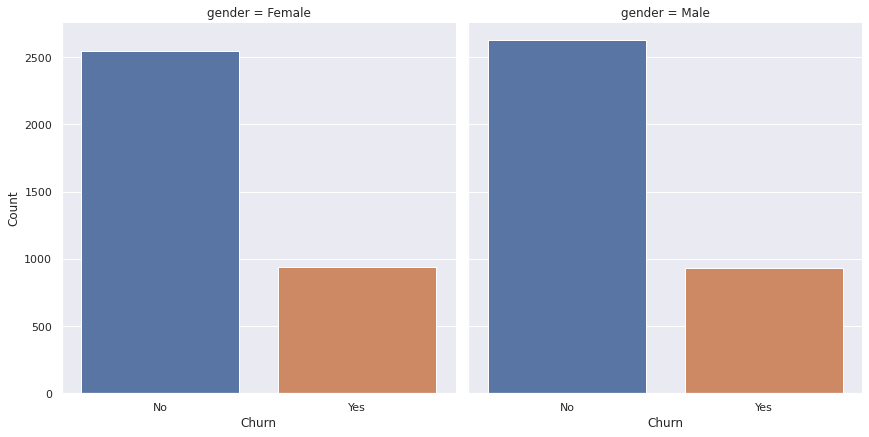

,Partner,Churn,Count
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


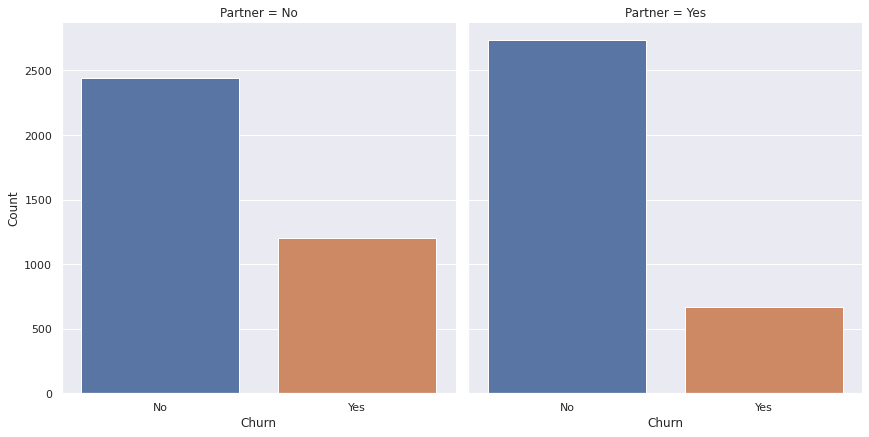

,Dependents,Churn,Count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


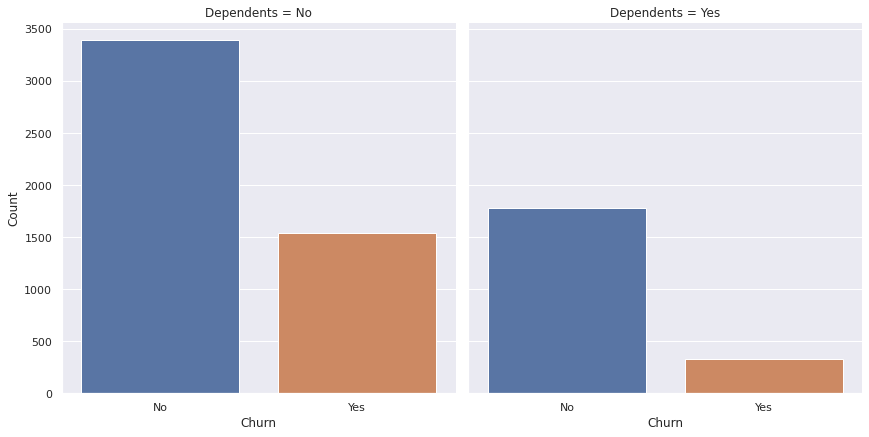

,PhoneService,Churn,Count
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


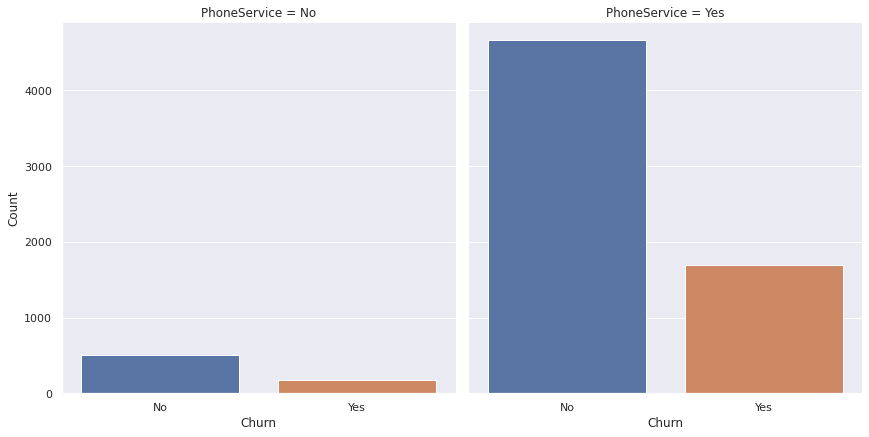

,MultipleLines,Churn,Count
0,No,No,2541
1,No,Yes,849
2,No phone service,No,512
3,No phone service,Yes,170
4,Yes,No,2121
5,Yes,Yes,850


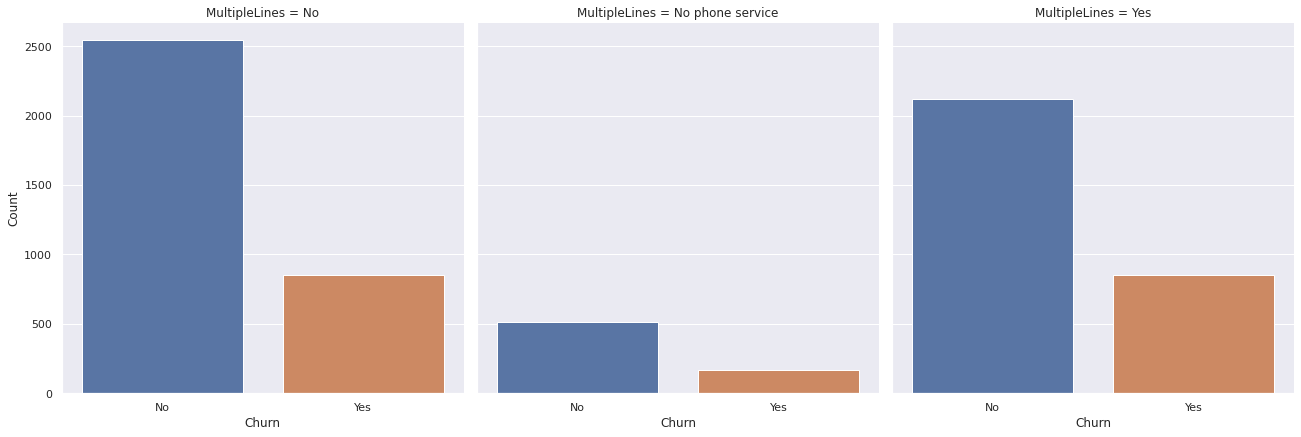

,InternetService,Churn,Count
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


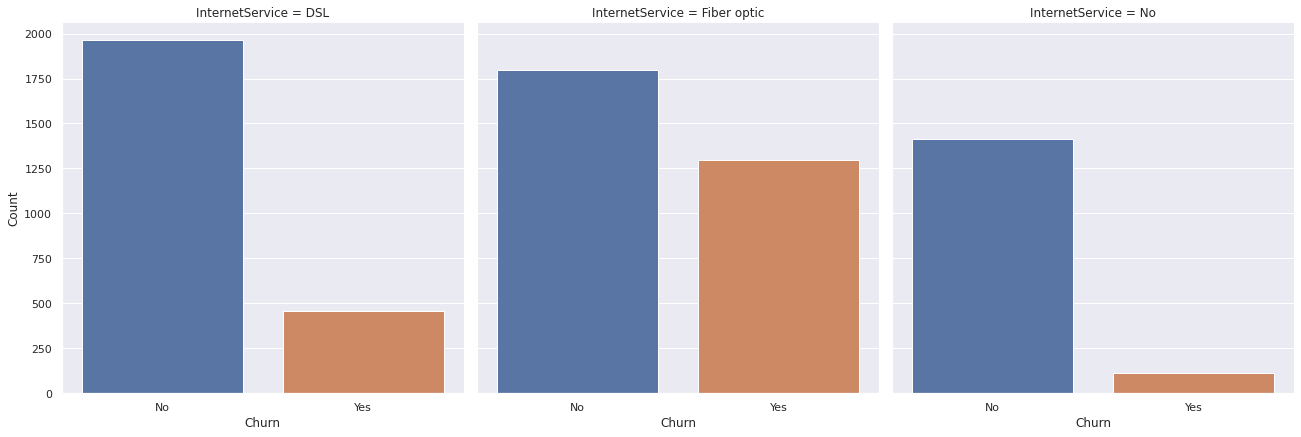

,OnlineSecurity,Churn,Count
0,No,No,2037
1,No,Yes,1461
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1724
5,Yes,Yes,295


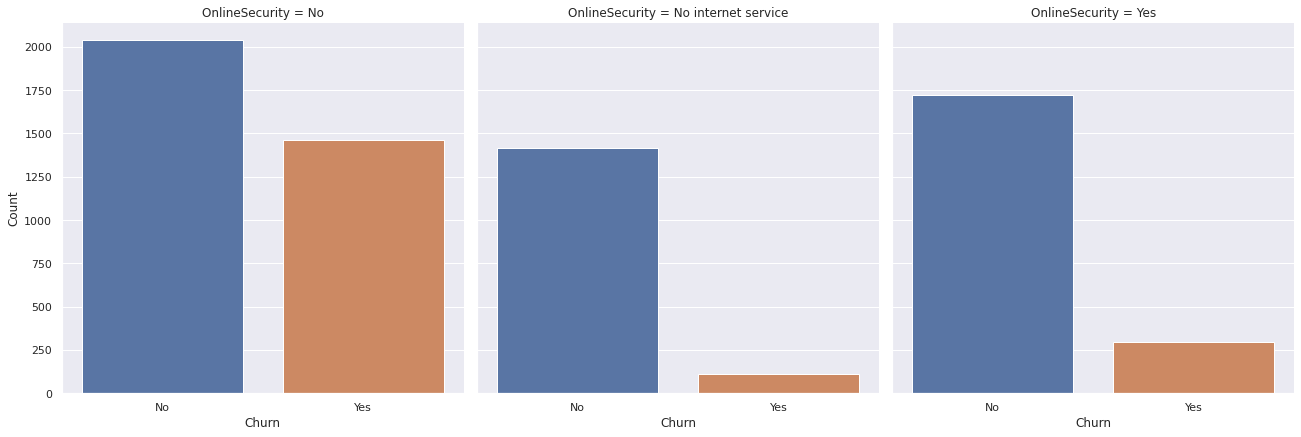

,OnlineBackup,Churn,Count
0,No,No,1855
1,No,Yes,1233
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1906
5,Yes,Yes,523


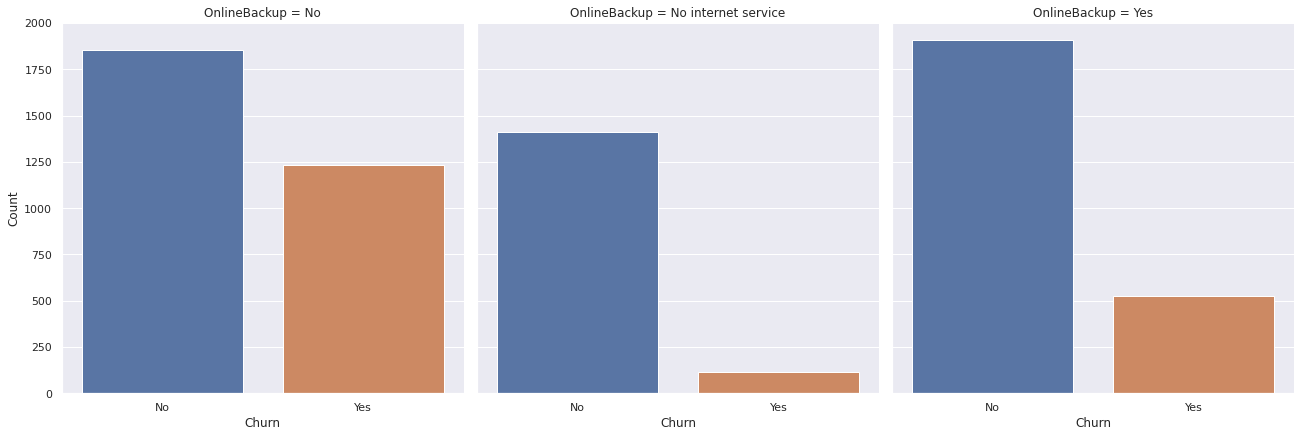

,DeviceProtection,Churn,Count
0,No,No,1884
1,No,Yes,1211
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1877
5,Yes,Yes,545


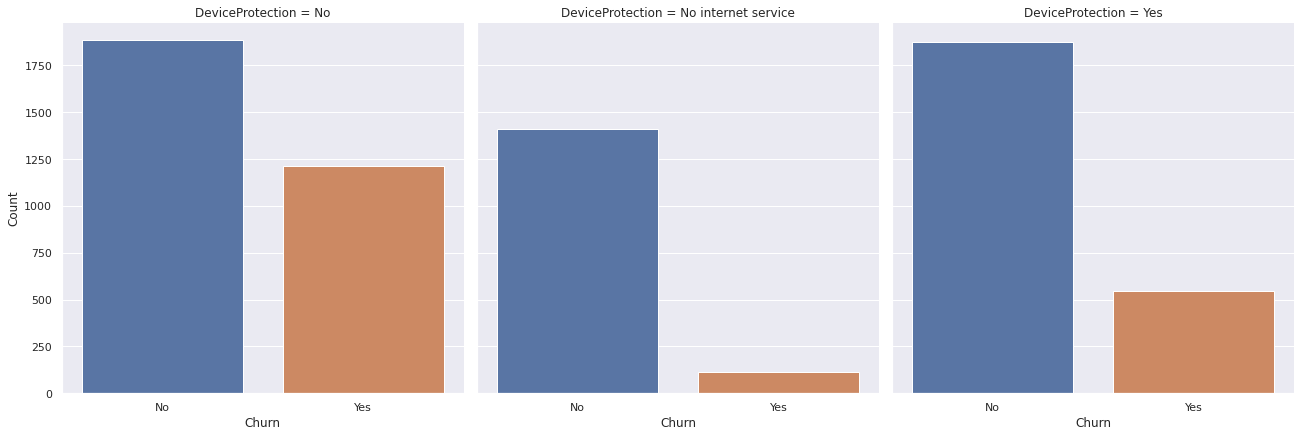

,TechSupport,Churn,Count
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


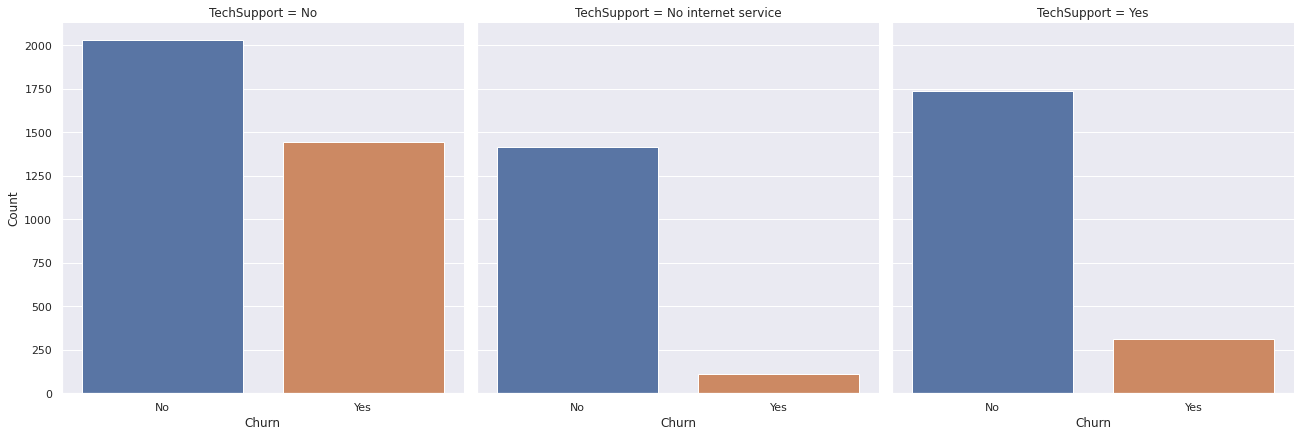

,StreamingTV,Churn,Count
0,No,No,1868
1,No,Yes,942
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1893
5,Yes,Yes,814


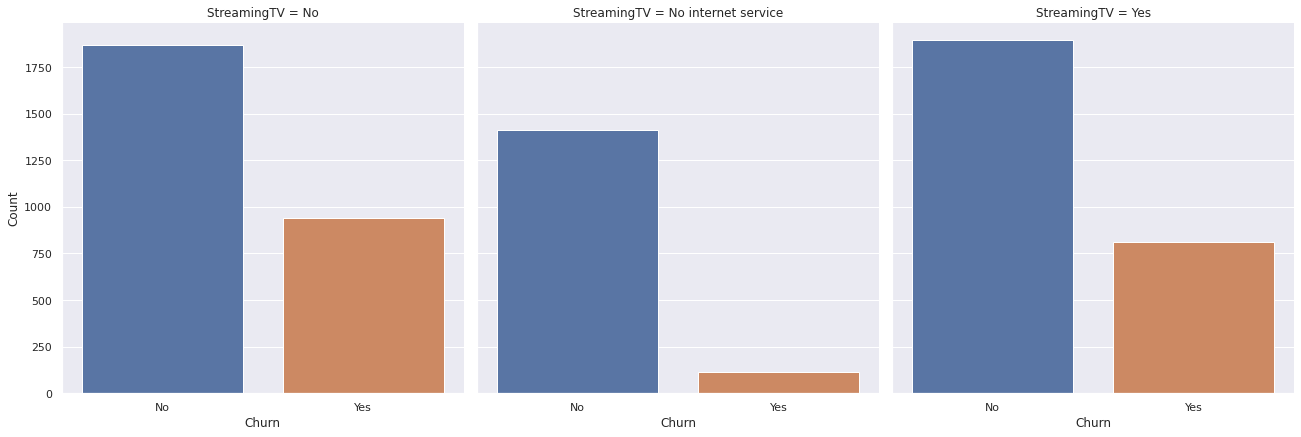

,StreamingMovies,Churn,Count
0,No,No,1847
1,No,Yes,938
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1914
5,Yes,Yes,818


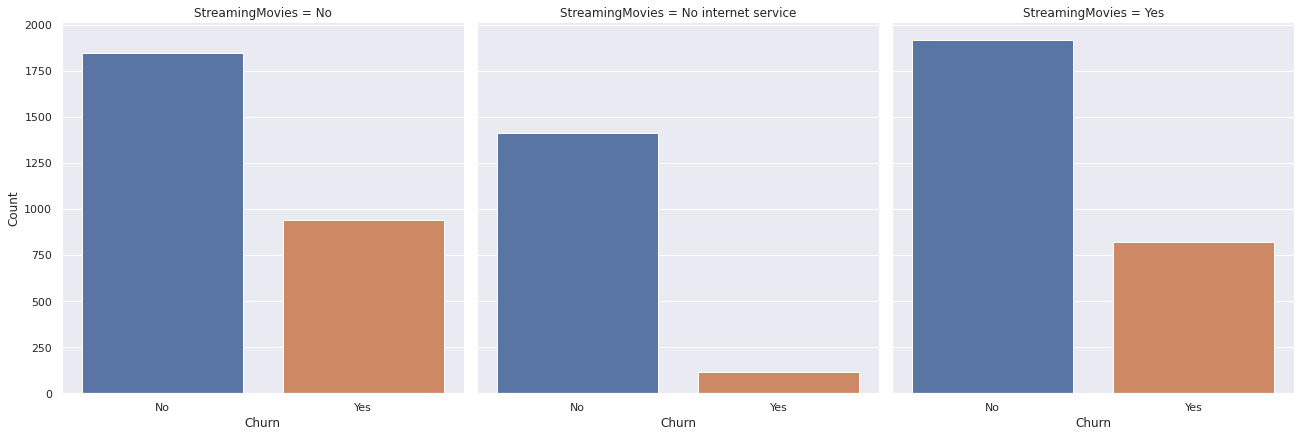

,Contract,Churn,Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


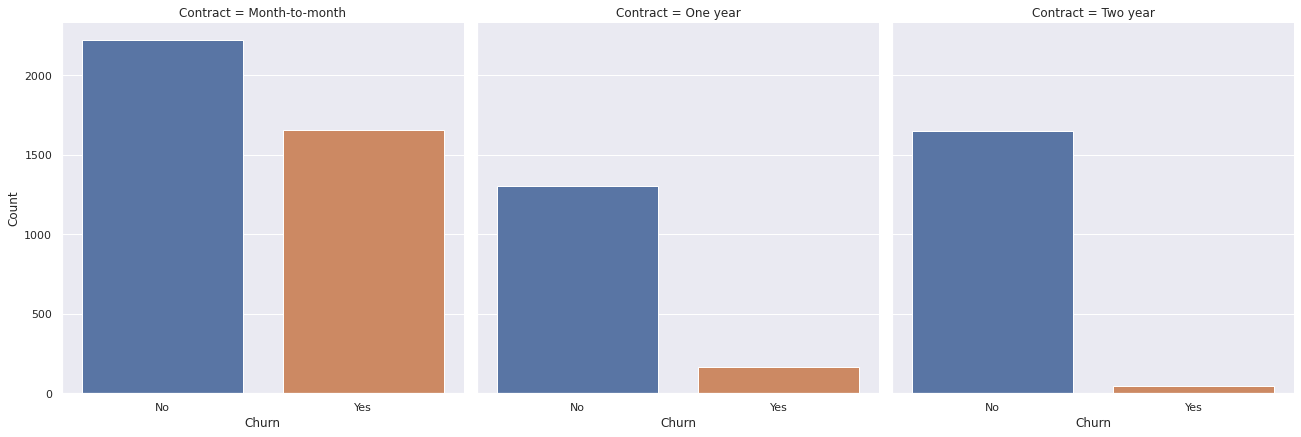

,PaperlessBilling,Churn,Count
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


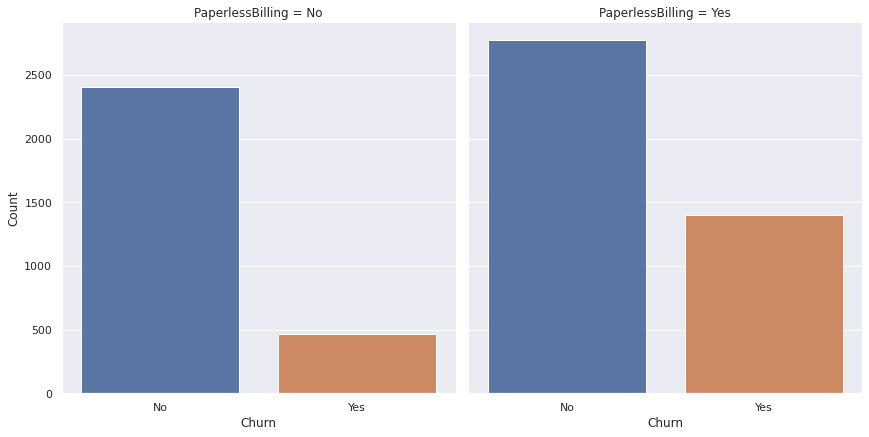

,PaymentMethod,Churn,Count
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


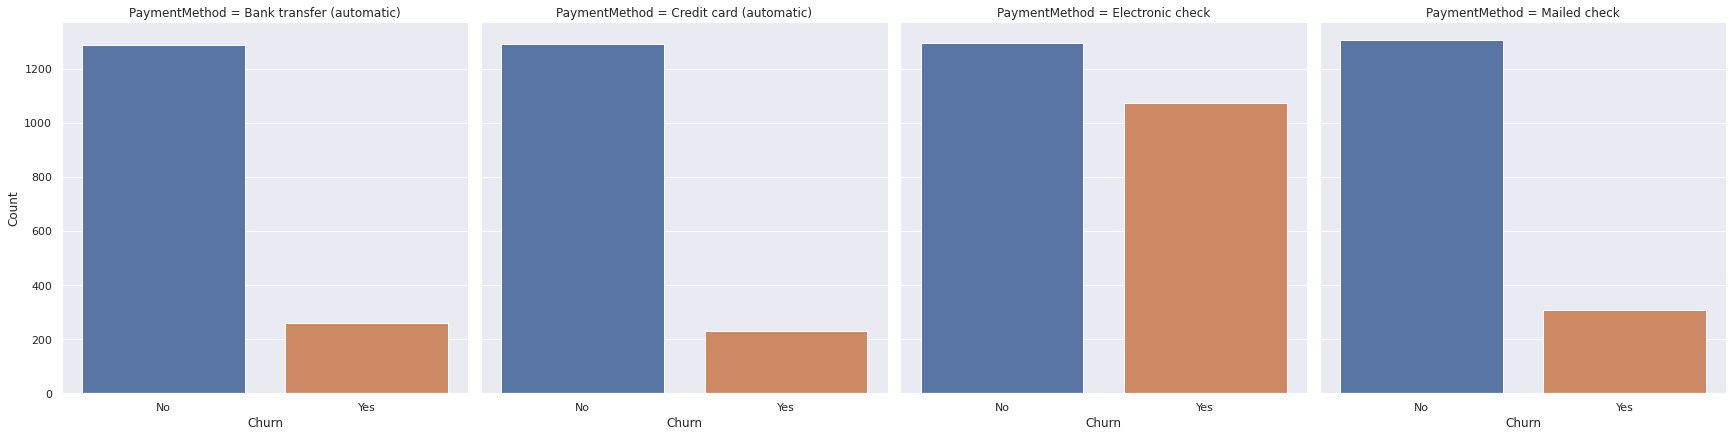

In [19]:
for i in Categorial_cols[:-1]:
    _df = df.groupby([i, 'Churn']).size().reset_index().rename(columns={0:'Count'})
    display(_df)
    sns.catplot(x='Churn',
                y='Count',
                col=i,
                kind='bar',
                data=_df,
               height=6)
    plt.show()

Female and male shows highest churn percentage, when they don't have partners

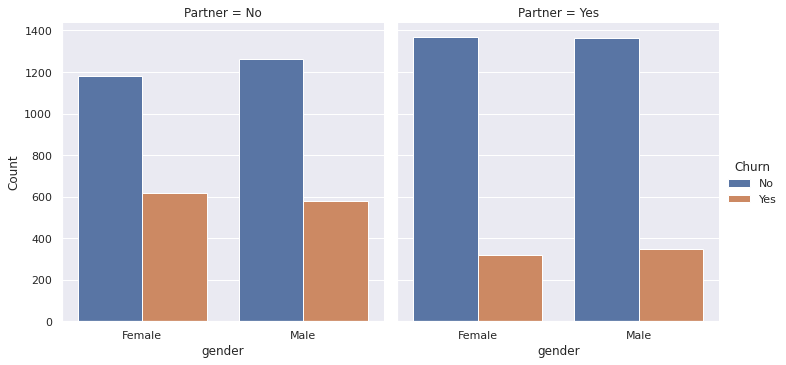

In [20]:
gc_count = df.groupby(['gender', 'Churn', 'Partner']).count()["tenure"].reset_index().rename(columns={"tenure": "Count"})
sns.catplot(x='gender', y='Count', hue='Churn', col='Partner', data=gc_count,  kind='bar')

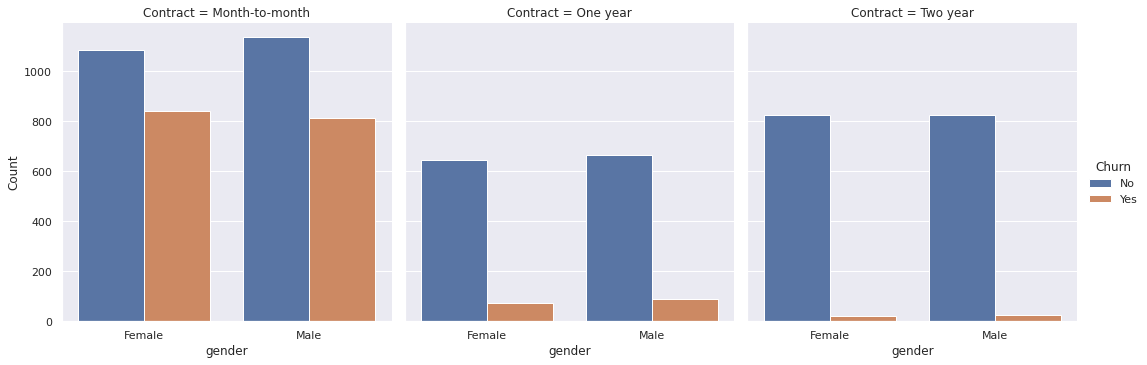

In [21]:
gc_count = df.groupby(['gender', 'Churn', 'Contract']).count()["tenure"].reset_index().rename(columns={"tenure": "Count"})
sns.catplot(x='gender', y='Count', hue='Churn', col='Contract', data=gc_count,  kind='bar')

In [22]:
gc_count = df.groupby(['gender', 
                       'Churn', 
                       'Contract', 
                       'Partner']).count()["tenure"].reset_index().rename(columns={"tenure": "Count"})

In [23]:
gc_count.pivot(index=['gender','Churn' ], columns=['Contract', 'Partner'], values="Count")

Contract     Month-to-month      One year      Two year     
Partner                  No  Yes       No  Yes       No  Yes
gender Churn                                                
Female No               655  428      292  351      233  590
       Yes              580  262       30   45       10   12
Male   No               725  412      283  381      253  571
       Yes              535  278       38   53        7   19

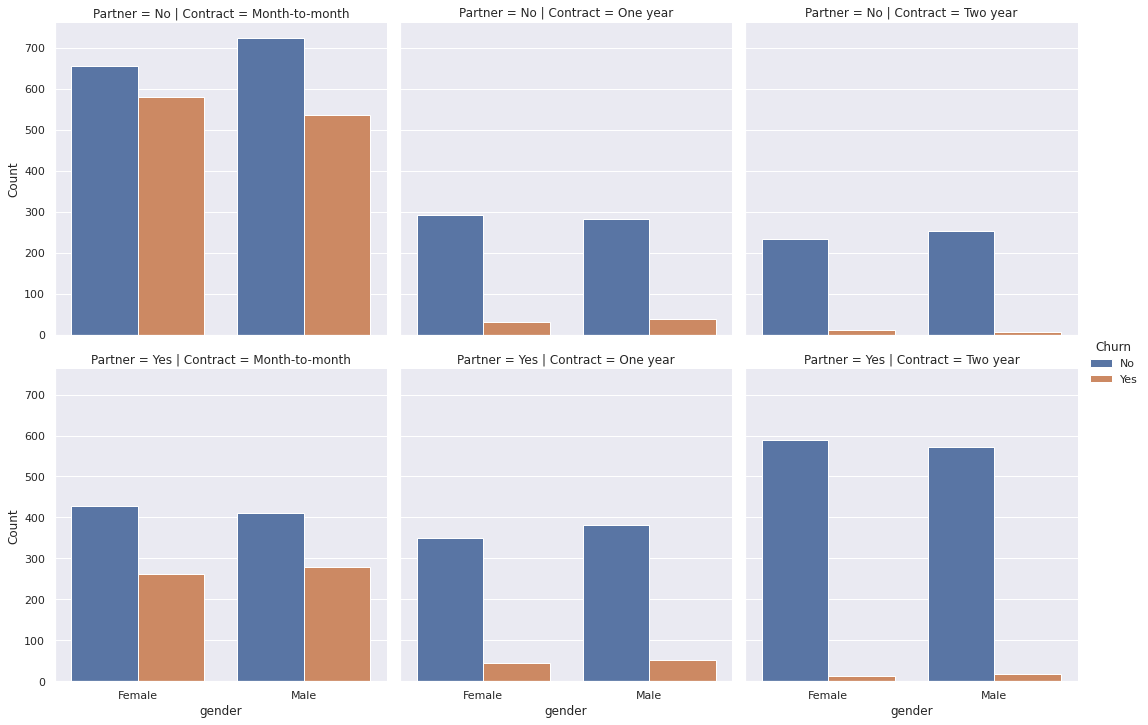

In [24]:
sns.catplot(x='gender', 
            y='Count',
            hue='Churn',
            col='Contract',
            row='Partner',
            data=gc_count,
            kind='bar')

**Churn Analysis for Gender by PaymentMethod**

* Male and female gender which have Electronic payment method show highest churn value

In [25]:
gpc_count = df[["gender", "Contract", "PaymentMethod", "Churn"]].groupby(["gender", "Contract", "PaymentMethod", "Churn"]).size().reset_index().rename(columns={0:'Count'})

In [26]:
gpc_count.pivot(index=["Churn", 'Contract'], columns=['gender', 'PaymentMethod'], values='Count')

gender                                  Female                          \
PaymentMethod        Bank transfer (automatic) Credit card (automatic)   
Churn Contract                                                           
No    Month-to-month                       198                     167   
      One year                             176                     175   
      Two year                             278                     279   
Yes   Month-to-month                       112                     103   
      One year                              17                      22   
      Two year                               7                       6   

gender                                                                  Male  \
PaymentMethod        Electronic check Mailed check Bank transfer (automatic)   
Churn Contract                                                                 
No    Month-to-month              435          283                       190   
      One year                    139          153                       177   
      Two year                     74          192                       267   
Yes   Month-to-month              492          135                        89   
      One year                     23           13                        21   
      Two year                      7            2                        12   

gender                                                                      
PaymentMethod        Credit card (automatic) Electronic check Mailed check  
Churn Contract                                                              
No    Month-to-month                     198              421          328  
      One year                           182              144          161  
      Two year                           289               81          187  
Yes   Month-to-month                      75              502          147  
      One year                            19               41           10  
      Two year                             7                6            1

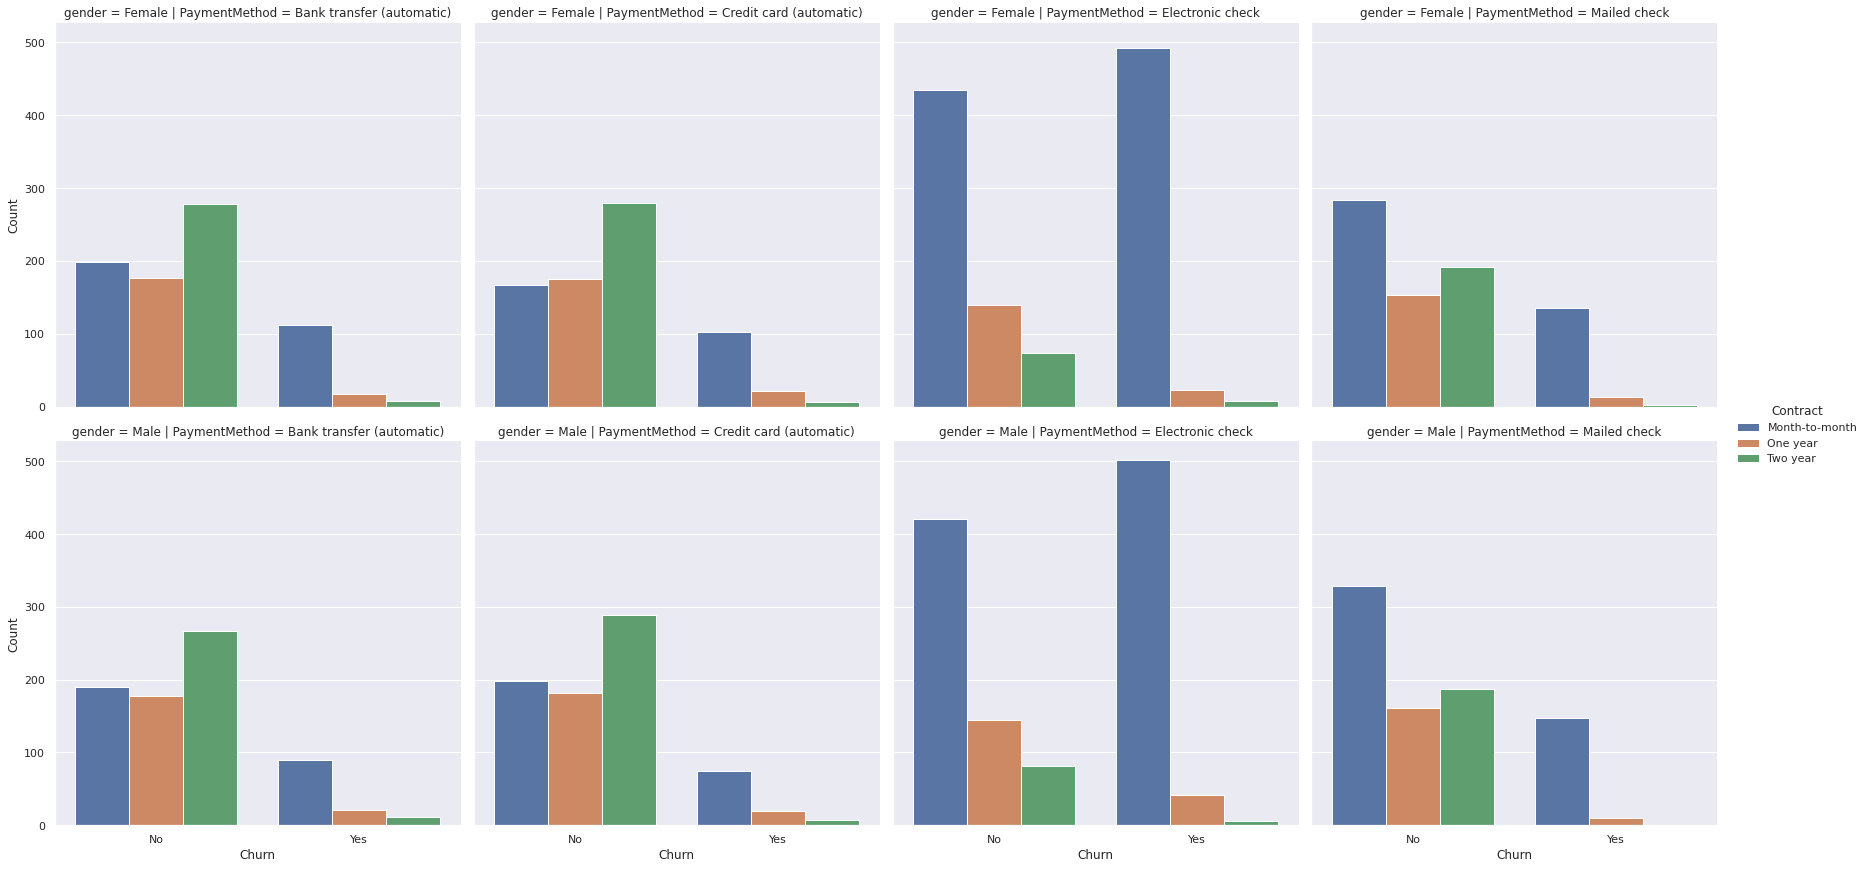

In [27]:
sns.catplot(x='Churn', y='Count', col="PaymentMethod", row="gender", kind='bar', hue='Contract', data=gpc_count, aspect=1, height=6)

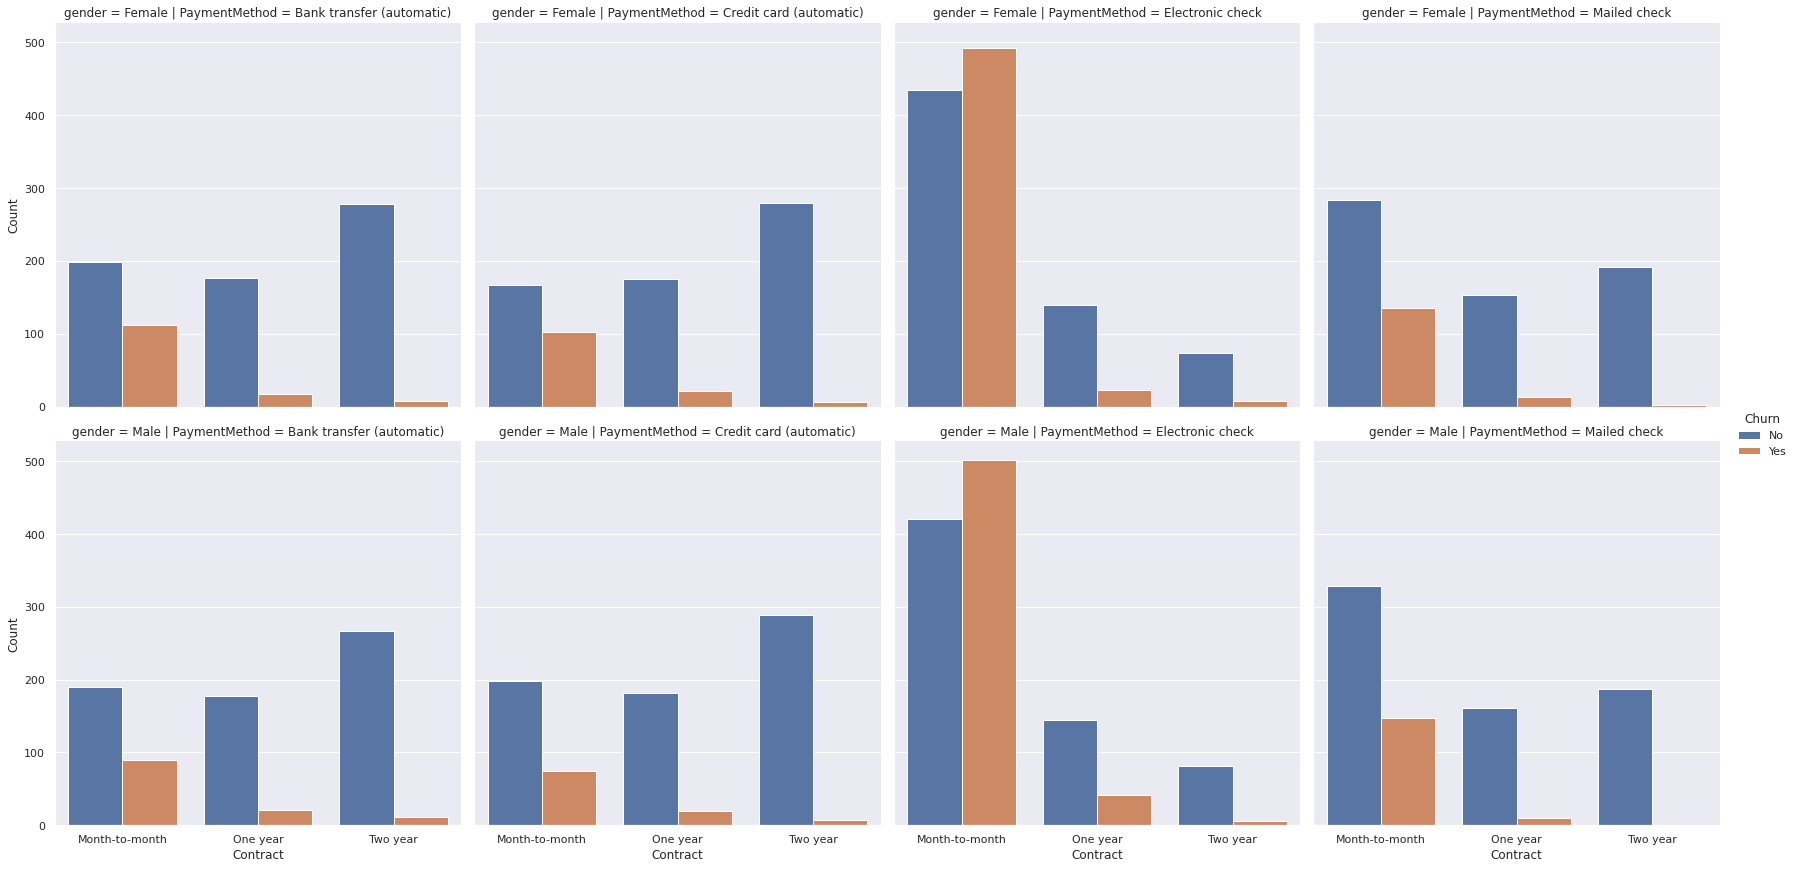

In [28]:
sns.catplot(x='Contract', y='Count', col="PaymentMethod", row="gender", kind='bar', hue='Churn', data=gpc_count, aspect=1, height=6)

In [29]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
ohe_map = {}
ohe_list_df = []
for cat_col in Categorial_cols[:-1]:
    ohe_map[cat_col] = OneHotEncoder(sparse=False)
    _t = ohe_map[cat_col].fit_transform(df[[cat_col]])
    ohe_list_df.append(pd.DataFrame(_t, columns=[f"{cat_col}_{i}" for i in ohe_map[cat_col].categories_[0]]))

In [32]:
mms_map = {}

for cols in ["MonthlyCharges", "TotalCharges", "tenure"]:
    mms_map[cols] = StandardScaler()
    ohe_list_df.append(pd.DataFrame(mms_map[cols].fit_transform(df[[cols]]), columns=[cols]))

In [33]:
dataset = pd.concat(ohe_list_df, axis=1)

In [34]:
Y = [1 if i == "Yes" else 0 for i in df["Churn"]]

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [36]:
def f(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)
    y_predict_prob = clf.predict_proba(X_test)
    print(confusion_matrix(y_test, y_predict))
    print('Accuracy Score: ', score)
    print('F1 Score: ', f1_score(y_test, y_predict))
    print('(Precision, Recall, F1 Score, total Acutal True): ', list(i[1] for i in precision_recall_fscore_support(y_test, y_predict)))
    plot_confusion_matrix(clf, X_test, y_test, cmap='Accent')
    plt.grid(False)
    plt.show()
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
    plot_precision_recall_curve(clf, X_test, y_test)
    plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.33, random_state=42)

[[1540  157]
 [ 300  328]]
Accuracy Score:  0.8034408602150538
F1 Score:  0.5893980233602875
(Precision, Recall, F1 Score, total Acutal True):  [0.6762886597938145, 0.5222929936305732, 0.5893980233602875, 628]


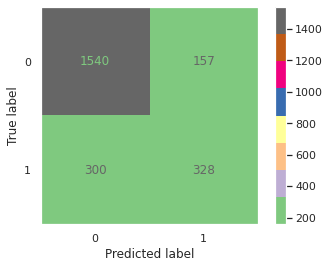

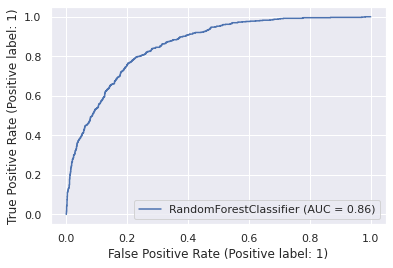

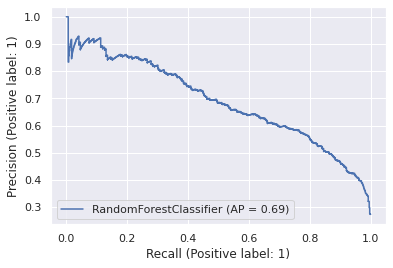

In [38]:
clf = RandomForestClassifier(max_depth=9, n_estimators=100, max_features=10)
f(clf, X_train, X_test, y_train, y_test)

[[1543  154]
 [ 365  263]]
Accuracy Score:  0.7767741935483871
F1 Score:  0.5033492822966508
(Precision, Recall, F1 Score, total Acutal True):  [0.6306954436450839, 0.41878980891719747, 0.5033492822966508, 628]


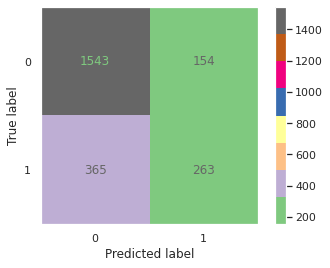

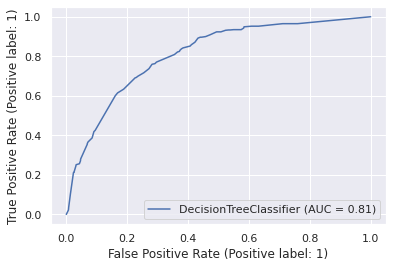

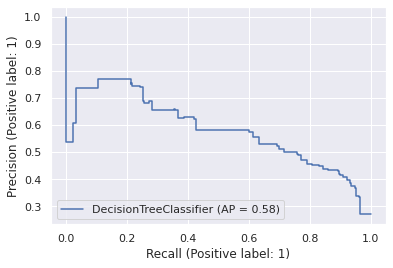

In [39]:
clf = DecisionTreeClassifier(max_depth=8, max_features=5)
f(clf, X_train, X_test, y_train, y_test)

[[1563  134]
 [ 305  323]]
Accuracy Score:  0.8111827956989247
F1 Score:  0.5953917050691245
(Precision, Recall, F1 Score, total Acutal True):  [0.7067833698030634, 0.5143312101910829, 0.5953917050691245, 628]


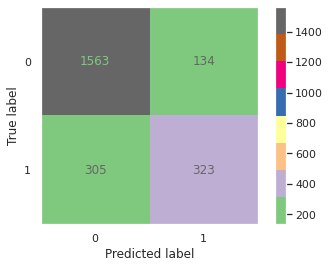

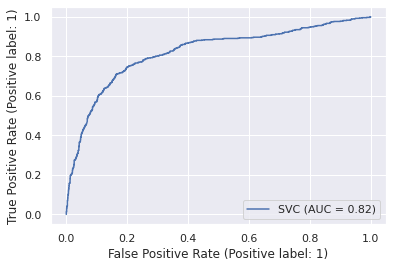

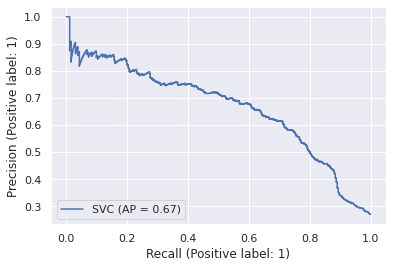

In [40]:
clf = SVC(random_state=0, degree=5,probability=True)
f(clf, X_train, X_test, y_train, y_test)

In [41]:
import xgboost as xgb

[07:46:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/netlink/pyenv/mlpractice/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/home/netlink/pyenv/mlpractice/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/home/netlink/pyenv/mlpractice/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[[1509  188]
 [ 305  323]]
Accuracy Score:  0.7879569892473118
F1 Score:  0.5671641791044777
(Precision, Recall, F1 Score, total Acutal True):  [0.6320939334637965, 0.5143312101910829, 0.5671641791044777, 628]


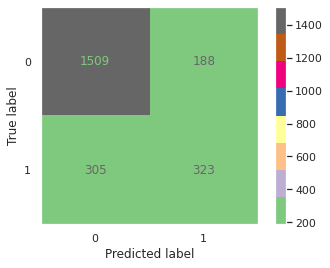

/home/netlink/pyenv/mlpractice/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


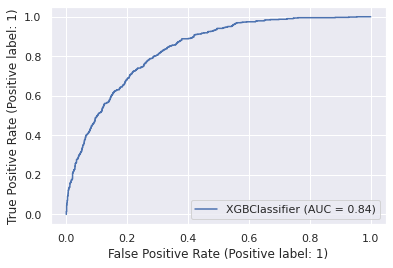

/home/netlink/pyenv/mlpractice/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


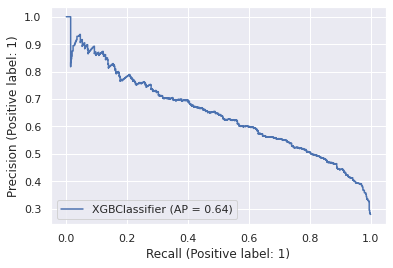

In [42]:
clf = xgb.XGBClassifier(use_label_encoder=False)
f(clf, X_train, X_test, y_train, y_test)

In [43]:
clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}